## IPL Data Analysis

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load matches.csv dataset
matches_df = pd.read_csv('C:\\Users\\himanshu\\Desktop\\ipl\\matches.csv')

# Load deliveries.csv dataset
deliveries_df = pd.read_csv('C:\\Users\\himanshu\\Desktop\\ipl\\deliveries.csv')

Show the first few rows of the datasets

In [167]:
print(matches_df.head())
print(deliveries_df.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

# Data Cleaning

In [168]:
# Checking for missing values in the datasets
print(matches_df.isnull().sum())
print(deliveries_df.isnull().sum())

# Drop columns which is not usefull
matches_df = matches_df.drop(columns=['umpire1', 'umpire2'])
deliveries_df = deliveries_df.drop(columns=['extra_runs', 'extras_type'])

# Fill missing values
matches_df = matches_df.fillna(0)
deliveries_df = deliveries_df.fillna(0)


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


# Count the number of wins by each team

In [169]:
team_wins = matches_df['winner'].value_counts().head(18)
print(team_wins)

Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Name: winner, dtype: int64


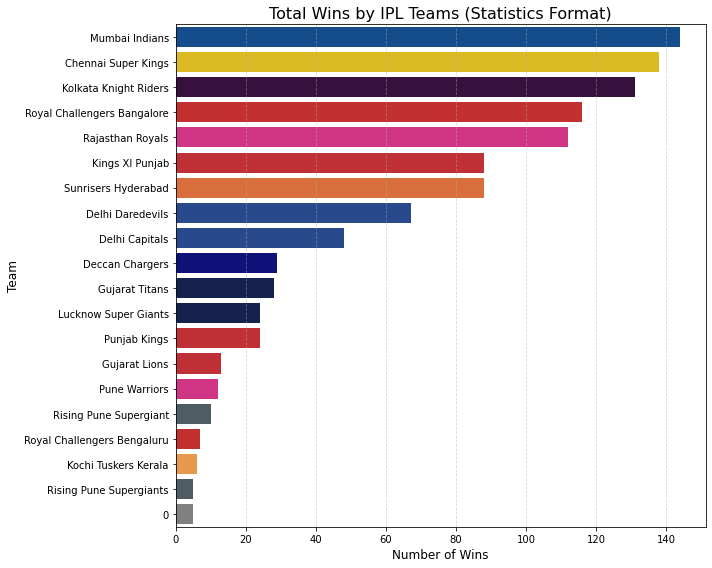

In [170]:
# Count total wins by each team
team_wins = matches_df['winner'].value_counts()

# Giving colours to teams
team_colors = {
    'Mumbai Indians': '#004BA0',
    'Chennai Super Kings': '#F9CD05',
    'Kolkata Knight Riders': '#3B0A45',
    'Royal Challengers Bangalore': '#DA1818',
    'Rajasthan Royals': '#EA1A85',
    'Sunrisers Hyderabad': '#F26522',
    'Kings XI Punjab': '#D71920',
    'Delhi Daredevils': '#17449B',
    'Delhi Capitals': '#17449B',
    'Deccan Chargers': '#00008B',
    'Gujarat Titans': '#0A1D57',
    'Punjab Kings': '#D71920',
    'Lucknow Super Giants': '#0A1D57',
    'Gujarat Lions': '#D71920',
    'Pune Warriors': '#EA1A85',
    'Rising Pune Supergiant': '#4B5D67',
    'Royal Challengers Bengaluru': '#DA1818',
    'Kochi Tuskers Kerala': '#FF9933',
    'Rising Pune Supergiants': '#4B5D67'
}

# sort in accending order
top_teams = team_wins.sort_values(ascending=False)

# Generate corresponding color list
colors = [team_colors.get(team, '#808080') for team in top_teams.index]

# Plot as horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_teams.values, y=top_teams.index, palette=colors)
plt.title('Total Wins by IPL Teams (Statistics Format)', fontsize=16)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Team Wins Per Season (IPL)

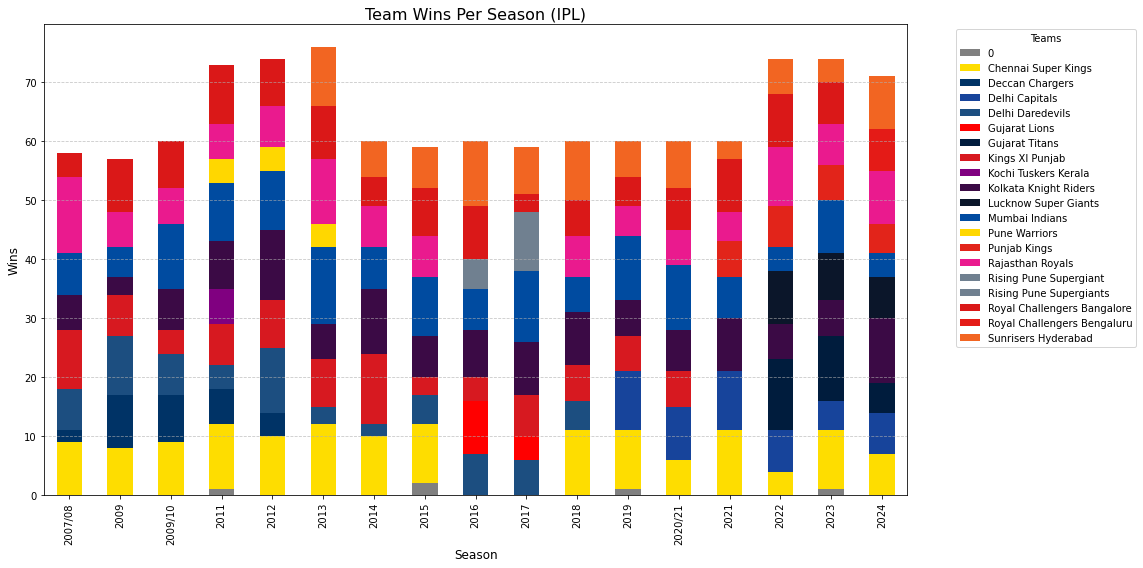

In [171]:
# Group by season and winner
season_wins = matches_df.groupby(['season', 'winner']).size().reset_index(name='wins')

# Pivot the data
season_wins_pivot = season_wins.pivot(index='season', columns='winner', values='wins').fillna(0)

# Custom team colors (choose one main color for each team)
team_colors = {
    'Mumbai Indians': '#004BA0',  # Blue
    'Chennai Super Kings': '#FEDD00',  # Yellow
    'Kolkata Knight Riders': '#3B0A45',  # Purple
    'Royal Challengers Bangalore': '#DA1818',  # Red
    'Rajasthan Royals': '#EA1A8E',  # Pink
    'Sunrisers Hyderabad': '#F26522',  # Orange
    'Kings XI Punjab': '#D71920',  # Red
    'Delhi Daredevils': '#1C4E80',  # Blue
    'Delhi Capitals': '#17449B',  # Blue
    'Deccan Chargers': '#003366',  # Dark Blue
    'Gujarat Titans': '#001C3D',  # Dark Blue
    'Punjab Kings': '#E2241A',  # Red
    'Lucknow Super Giants': '#0B162A',  # Dark Blue
    'Gujarat Lions': '#FF0000',  # Red
    'Pune Warriors': '#FFD700',  # Golden
    'Rising Pune Supergiant': '#708090',  # Grey Blue
    'Royal Challengers Bengaluru': '#E41B17',  # Red
    'Kochi Tuskers Kerala': '#800080',  # Purple
    'Rising Pune Supergiants': '#708090'  # Grey Blue
}

# Get the colors in order of the columns in the pivot
team_order = season_wins_pivot.columns
color_list = [team_colors.get(team, '#808080') for team in team_order]  # Default grey if not found

# Plot
season_wins_pivot.plot(kind='bar', stacked=True, figsize=(16, 8), color=color_list)
plt.title('Team Wins Per Season (IPL)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top 20 Run Scorers

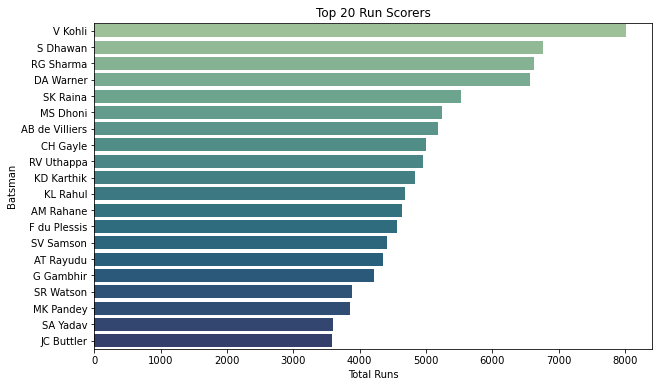

In [172]:
top_runs = deliveries_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_runs.values, y=top_runs.index, palette='crest')
plt.title('Top 20 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

# Top 20 Wicket Takers

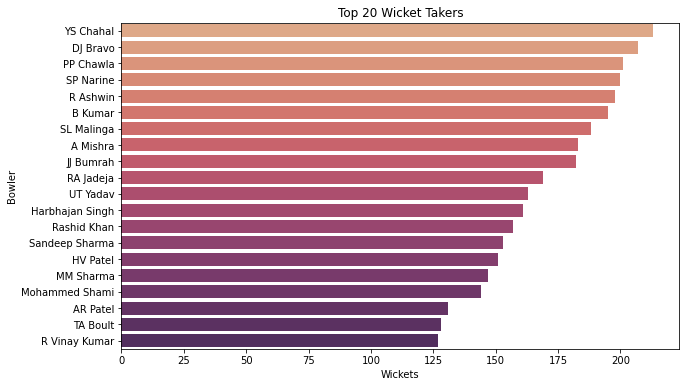

In [173]:
wickets_df = deliveries_df[deliveries_df['is_wicket'] == 1]
top_wickets = wickets_df['bowler'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_wickets.values, y=top_wickets.index, palette='flare')
plt.title('Top 20 Wicket Takers')
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.show()

# Best Strike Rates (Min 200 balls faced)

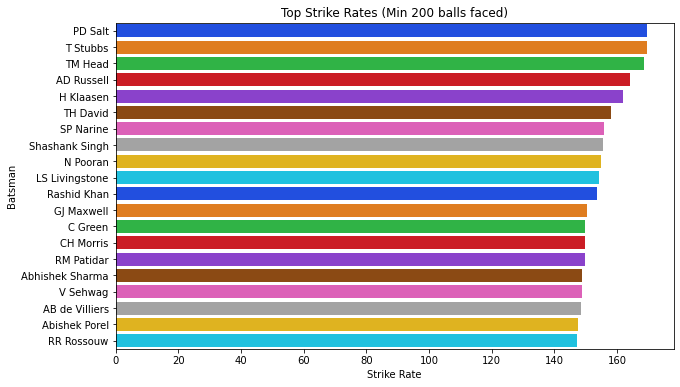

In [174]:
balls_faced = deliveries_df.groupby('batter').size()
runs_scored = deliveries_df.groupby('batter')['batsman_runs'].sum()
strike_rate = (runs_scored / balls_faced) * 100
qualified_batsmen = strike_rate[balls_faced >= 200].sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=qualified_batsmen.values, y=qualified_batsmen.index, palette='bright')
plt.title('Top Strike Rates (Min 200 balls faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()

# Overall Contribution Score (Runs + 20 * Wickets)

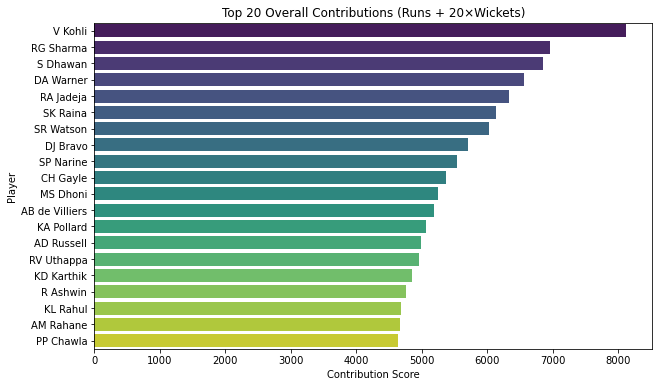

In [175]:
batsman_total = deliveries_df.groupby('batter')['batsman_runs'].sum()
bowler_total = wickets_df['bowler'].value_counts()
players = set(batsman_total.index).union(set(bowler_total.index))

contribution = {
    player: batsman_total.get(player, 0) + 20 * bowler_total.get(player, 0)
    for player in players
}
contribution_series = pd.Series(contribution).sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=contribution_series.values, y=contribution_series.index, palette='viridis')
plt.title('Top 20 Overall Contributions (Runs + 20×Wickets)')
plt.xlabel('Contribution Score')
plt.ylabel('Player')
plt.show()

# The most Player of the Match awards

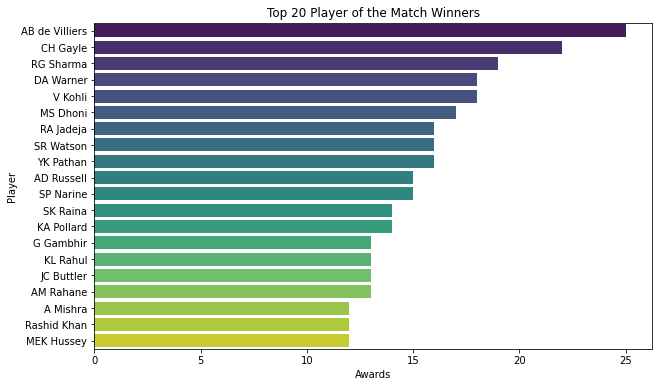

In [176]:
top_players = matches_df['player_of_match'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette='viridis')
plt.title('Top 20 Player of the Match Winners')
plt.xlabel('Awards')
plt.ylabel('Player')
plt.show()

# Teams win percentages

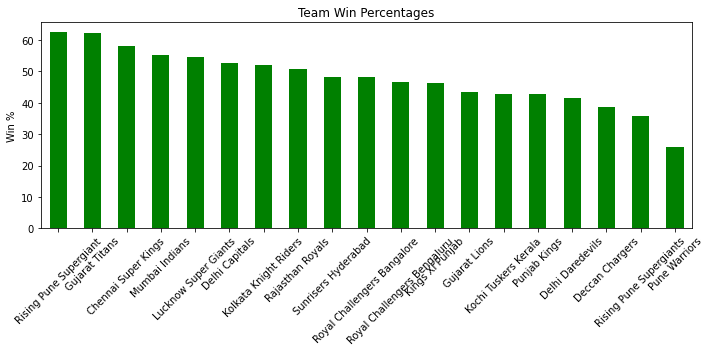

In [177]:
total_matches = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
total_wins = matches_df['winner'].value_counts()
win_percentage = (total_wins / total_matches * 100).sort_values(ascending=False).dropna()

win_percentage.plot(kind='bar', figsize=(10,5), color='green', title='Team Win Percentages')
plt.ylabel('Win %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Venue-wise Match Count & Win Analysis

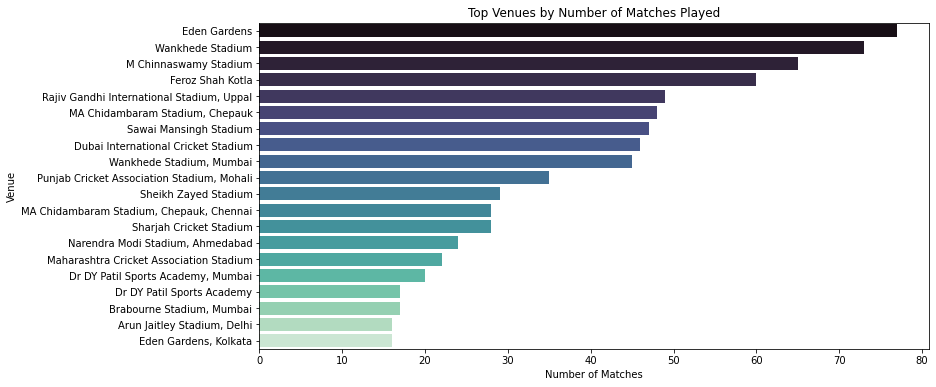

In [178]:
venue_wins = matches_df['venue'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=venue_wins.values, y=venue_wins.index, palette='mako')
plt.title('Top Venues by Number of Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

# Toss Winner vs Match Winner

Toss winners also won the match 50.59% of the time.


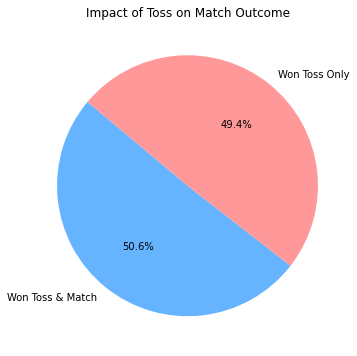

In [179]:
# Check how often toss winners win the match
toss_match_win = matches_df[matches_df['toss_winner'] == matches_df['winner']]
toss_win_percentage = (len(toss_match_win) / len(matches_df)) * 100

print(f"Toss winners also won the match {toss_win_percentage:.2f}% of the time.")

# Plot pie chart for toss impact
labels = ['Won Toss & Match', 'Won Toss Only']
values = [len(toss_match_win), len(matches_df) - len(toss_match_win)]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Impact of Toss on Match Outcome')
plt.show()

# Toss Decision Impact (Bat/Field)

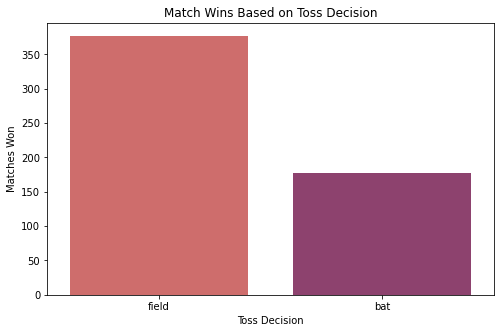

In [180]:
decision_outcome = matches_df[matches_df['toss_winner'] == matches_df['winner']]['toss_decision'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=decision_outcome.index, y=decision_outcome.values, palette='flare')
plt.title('Match Wins Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Matches Won')
plt.show()

# Head-To-Head Comparison

Select two teams for head-to-head comparison:
1. Mumbai Indians
2. Chennai Super Kings
3. Kolkata Knight Riders
4. Royal Challengers Bangalore
5. Rajasthan Royals
6. Sunrisers Hyderabad
7. Kings XI Punjab
8. Delhi Daredevils
9. Delhi Capitals
10. Deccan Chargers
11. Gujarat Titans
12. Punjab Kings
13. Lucknow Super Giants
14. Gujarat Lions
15. Pune Warriors
16. Rising Pune Supergiant
17. Royal Challengers Bengaluru
18. Kochi Tuskers Kerala


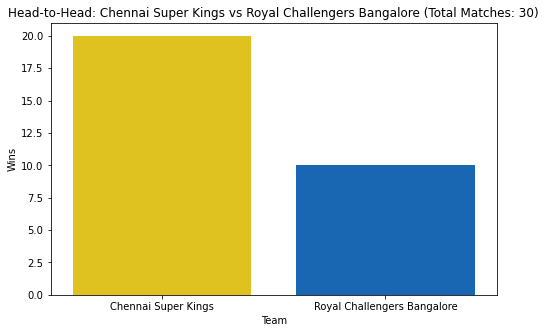

In [181]:
# List of all IPL teams (use indices to select)
teams = [
    'Mumbai Indians', 
    'Chennai Super Kings', 
    'Kolkata Knight Riders', 
    'Royal Challengers Bangalore', 
    'Rajasthan Royals', 
    'Sunrisers Hyderabad', 
    'Kings XI Punjab', 
    'Delhi Daredevils', 
    'Delhi Capitals', 
    'Deccan Chargers', 
    'Gujarat Titans', 
    'Punjab Kings', 
    'Lucknow Super Giants', 
    'Gujarat Lions', 
    'Pune Warriors', 
    'Rising Pune Supergiant', 
    'Royal Challengers Bengaluru', 
    'Kochi Tuskers Kerala'
]

# Display team list with index for user input
print("Select two teams for head-to-head comparison:")
for i, team in enumerate(teams, start=1):
    print(f"{i}. {team}")

# User input for teams selection
team1_idx = int(input("Enter the number for the first team: ")) - 1
team2_idx = int(input("Enter the number for the second team: ")) - 1

team1 = teams[team1_idx]
team2 = teams[team2_idx]

# Filter matches between the two selected teams
head_to_head = matches_df[((matches_df['team1'] == team1) & (matches_df['team2'] == team2)) |
                          ((matches_df['team1'] == team2) & (matches_df['team2'] == team1))]

# Count wins
team1_wins = head_to_head[head_to_head['winner'] == team1].shape[0]
team2_wins = head_to_head[head_to_head['winner'] == team2].shape[0]
total_matches = head_to_head.shape[0]

# Win data dictionary
win_data = {
    'Teams': [team1, team2],
    'Wins': [team1_wins, team2_wins]
}

# Convert to DataFrame
win_df = pd.DataFrame(win_data)


# Plot the Head-to-Head Result
plt.figure(figsize=(8, 5))
sns.barplot(x='Teams', y='Wins', data=win_df, palette=[(1.0, 0.85, 0.0), (0.0, 0.4, 0.8)])  # yellow & blue colors
plt.title(f'Head-to-Head: {team1} vs {team2} (Total Matches: {total_matches})')
plt.ylabel('Wins')
plt.xlabel('Team')
plt.show()


# win ratio of two team

In [182]:
team1_ratio = (team1_wins / total_matches) * 100
team2_ratio = (team2_wins / total_matches) * 100

print(f"\n{team1} Win Ratio: {team1_ratio:.2f}%")
print(f"{team2} Win Ratio: {team2_ratio:.2f}%")


Chennai Super Kings Win Ratio: 66.67%
Royal Challengers Bangalore Win Ratio: 33.33%


Model Accuracy: 49.77%


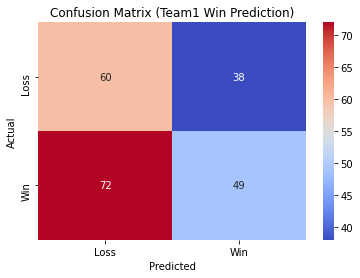

In [183]:
# Drop matches with missing important fields
matches_df = matches_df.dropna(subset=['team1', 'team2', 'winner', 'venue', 'toss_winner'])

# Create target: 1 if team1 wins, 0 otherwise
matches_df['team1_win'] = matches_df['winner'] == matches_df['team1']
matches_df['team1_win'] = matches_df['team1_win'].astype(int)

# Encode categorical features
for col in ['team1', 'team2', 'toss_winner', 'venue']:
    matches_df[col] = matches_df[col].astype('category')
    matches_df[col + '_code'] = matches_df[col].cat.codes  # Keep original and encoded versions

# Features and target
X = matches_df[['team1_code', 'team2_code', 'toss_winner_code', 'venue_code']]
y = matches_df['team1_win']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
plt.title("Confusion Matrix (Team1 Win Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===========================
# TEAM-TO-CODE MAPPING FOR USER INPUT PREDICTION
# ===========================

# Dictionary mapping from team name to encoded value
team_encoder = dict(zip(matches_df['team1'].cat.categories, matches_df['team1_code'].unique()))
venue_encoder = dict(zip(matches_df['venue'].cat.categories, matches_df['venue_code'].unique()))


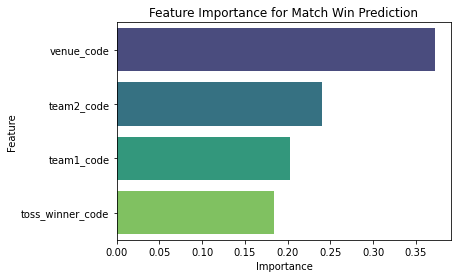


Feature Importance:
            Feature  Importance
3        venue_code    0.372817
1        team2_code    0.240325
0        team1_code    0.202427
2  toss_winner_code    0.184431


In [184]:
# Extract feature importance from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance and plot the results
feature_df = feature_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance for Match Win Prediction')
plt.show()

print("\nFeature Importance:")
print(feature_df)


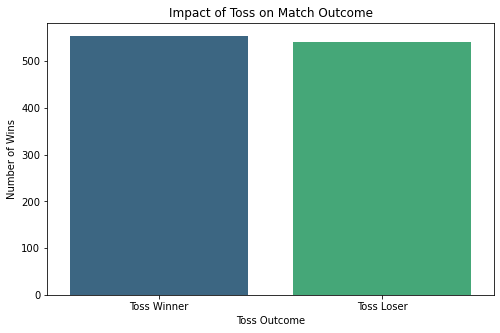

In [185]:
# Example counts (you can calculate these dynamically as needed)
toss_win_count = matches_df[matches_df['toss_winner'] == matches_df['winner']].shape[0]
toss_loss_count = matches_df[matches_df['toss_winner'] != matches_df['winner']].shape[0]

# Create a DataFrame for plotting
toss_data = pd.DataFrame({
    'Toss_Result': ['Toss Winner', 'Toss Loser'],
    'Wins': [toss_win_count, toss_loss_count]
})

# Plotting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=toss_data, x='Toss_Result', y='Wins', palette='viridis')
plt.title('Impact of Toss on Match Outcome')
plt.xlabel('Toss Outcome')
plt.ylabel('Number of Wins')
plt.show()
